We begin by loading seismic trace data and corresponding impedance trace data. The time vector, seismic trace, and impedance trace are cropped based on a specified time window. Let $t$ be the time vector, $S(t)$ the seismic trace, and $I(t)$ the impedance trace. We select a time range $[t_{\text{start}}, t_{\text{end}}]$ and extract the corresponding portions of the data:

\begin{equation}
    S_{\text{cropped}} = S(t \in [t_{\text{start}}, t_{\text{end}}])
\end{equation}
\begin{equation}
    I_{\text{cropped}} = I(t \in [t_{\text{start}}, t_{\text{end}}])
\end{equation}

To ensure that the data is well-conditioned for training, we normalize the seismic and impedance traces using Min-Max scaling. For a given data vector $x$, the normalization is performed as follows:

\begin{equation}
    x_{\text{normalized}} = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}
\end{equation}

where $\text{min}(x)$ and $\text{max}(x)$ are the minimum and maximum values of $x$, respectively.


We set up a quantum device with a specified number of qubits (wires). For our model, we use a device with $n_{\text{wires}} = 4$.

The quantum circuit is designed to encode the normalized seismic data into quantum states. Each input value $x_i$ is mapped to a quantum state via:

\begin{equation}
    |\psi_i\rangle = \cos(\theta_i)|0\rangle + \sin(\theta_i)|1\rangle
\end{equation}

where $\theta_i = x_i \cdot \pi$. The circuit includes angle embedding operations and basic entangler layers to create quantum correlations.


Random layers are applied to the qubits using parameterized rotations. The rotations include gates such as $R_X$ and $R_Y$:

\begin{equation}
    U(\theta) = \exp\left(-i \theta \sum_{i < j} X_i X_j\right)
\end{equation}

where $X_i$ and $X_j$ are Pauli-X operators on qubits $i$ and $j$.

- {Quantum Circuit with Noise}
 random layers are used to create unitaries, which are operations applied to quantum states. The circuits designed can be categorized into two types:

- {T-Symmetric Unitaries}

For T-symmetric unitaries, only $RY$ rotations are used. This simplifies the unitary operations to:

\begin{equation}
U(\theta) = \exp\left(-i \theta Y\right)
\end{equation}

where $Y$ is the Pauli-Y matrix and $\theta$ is a parameter associated with the rotation. This approach ensures the unitary transformation retains T-symmetry, often applied in specific quantum algorithms.


General unitaries can include $RX$, $RY$, and $RZ$ rotations. The unitary matrix $U(\theta)$ is defined as:

\begin{equation}
U(\theta) = \exp\left(-i \theta X\right) \text{ or } \exp\left(-i \theta Y\right) \text{ or } \exp\left(-i \theta Z\right)
\end{equation}

where $X$, $Y$, and $Z$ are the Pauli matrices. Each rotation corresponds to a different axis of rotation in the Bloch sphere representation.

A random circuit is generated with a specified number of layers and gates. The rotations and weights are applied to qubits to construct the quantum circuit.


Data obtained from the quantum circuits is processed to extract meaningful features. For each qubit, the following statistics are computed:

The mean and variance of the measurement outcomes are computed. The feature vector $\mathbf{f}_k$ for a qubit is defined as:

\begin{equation}
\mathbf{f}_k = \left[\text{mean}_1, \text{mean}_2, \ldots, \text{mean}_n, \text{variance}_1, \text{variance}_2, \ldots, \text{variance}_n\right]
\end{equation}

where $\text{mean}_i$ and $\text{variance}_i$ are the mean and variance of outcomes for the $i$-th qubit, respectively, and $n$ is the number of qubits.

- {Kernel Principal Component Analysis (Kernel PCA)}

Kernel PCA extends traditional PCA by using a kernel function to map data into a higher-dimensional space, which allows for capturing non-linear relationships.

- {Kernel PCA with Radial Basis Function (RBF) Kernel}

The RBF kernel function is defined as:

\begin{equation}
K(x, x') = \exp\left(-\gamma \|x - x'\|^2\right)
\end{equation}

where $\gamma$ is a hyperparameter controlling the width of the Gaussian function, and $\|x - x'\|^2$ is the squared Euclidean distance between data points $x$ and $x'$.

The Kernel PCA algorithm involves the following steps:

- {Compute the Kernel Matrix:} Calculate the kernel matrix $K$ for the dataset using the RBF kernel.
    - {Center the Kernel Matrix:} Adjust the kernel matrix to make it suitable for PCA by centering it.
    - {Perform Eigenvalue Decomposition:} Extract the principal components from the centered kernel matrix.
    - {Transform the Data:} Project the original data onto the principal components to obtain a lower-dimensional representation.


An enhanced quantum circuit incorporates noise layers to simulate real-world conditions and test robustness.


The enhanced circuit includes:

- {Hadamard Gates:} Apply Hadamard gates to create superposition states:

    \begin{equation}
    H = \frac{1}{\sqrt{2}} \begin{pmatrix}
    1 & 1 \\
    1 & -1
    \end{pmatrix}
    \end{equation}

    - {Noise Layer:} Introduce a noise layer characterized by some parameter $\phi$:

    \begin{equation}
    U_{\text{noise}} = \exp\left(-i \phi Z\right)
    \end{equation}

    - {Entangling Operations:} Use CNOT gates to create entanglement between qubits:

    \begin{equation}
    \text{CNOT}(|00\rangle) = |00\rangle
    \end{equation}

    \begin{equation}
    \text{CNOT}(|01\rangle) = |01\rangle
    \end{equation}

    \begin{equation}
    \text{CNOT}(|10\rangle) = |11\rangle
    \end{equation}

    \begin{equation}
    \text{CNOT}(|11\rangle) = |10\rangle
    \end{equation}


The expectation values of Pauli-Z operators are measured from the noisy quantum circuit:

\begin{equation}
\langle \psi | Z_i | \psi \rangle
\end{equation}

These measurements are processed similarly to those from non-noisy circuits.


An enhanced circuit includes a noise layer to simulate real-world conditions. The enhanced circuit applies Hadamard gates, entangling operations, and random layers. It also includes a noise layer parameterized by $\pi / 4$.


We generate raw data using both T-symmetric and general unitary operations. The data is then processed to extract means and variances of the qubit outcomes:

\begin{equation}
    \text{mean}_q = \frac{1}{N} \sum_{i=1}^N \langle \psi_i | Z_q | \psi_i \rangle
\end{equation}
\begin{equation}
    \text{variance}_q = \frac{1}{N} \sum_{i=1}^N \left( \langle \psi_i | Z_q | \psi_i \rangle - \text{mean}_q \right)^2
\end{equation}

where $N$ is the number of circuits and $q$ denotes a specific qubit.


We apply Kernel Principal Component Analysis (Kernel PCA) to the processed data for dimensionality reduction. The Kernel PCA is performed with a Radial Basis Function (RBF) kernel:

\begin{equation}
    K(x, x') = \exp\left(-\gamma \|x - x'\|^2\right)
\end{equation}

where $\gamma$ is a kernel parameter. The transformed data is visualized using scatter plots.


We plot:
- {Seismic Trace and Impedance Trace:} The normalized seismic trace and impedance trace are plotted over time.
- {Statistical Source Wavelet:} The source statistical wavelet is plotted to visualize the wavelet used for estimation.


Number of clusters: 2
Number of samples: 60
Silhouette Score: 0.47


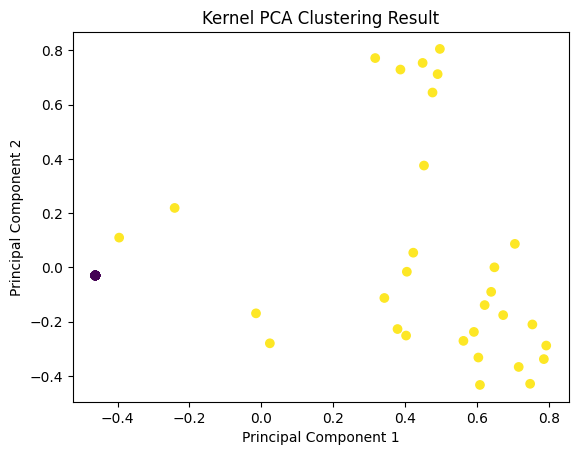

Number of clusters (enhanced): 2
Number of samples (enhanced): 60
Silhouette Score (enhanced): 0.21


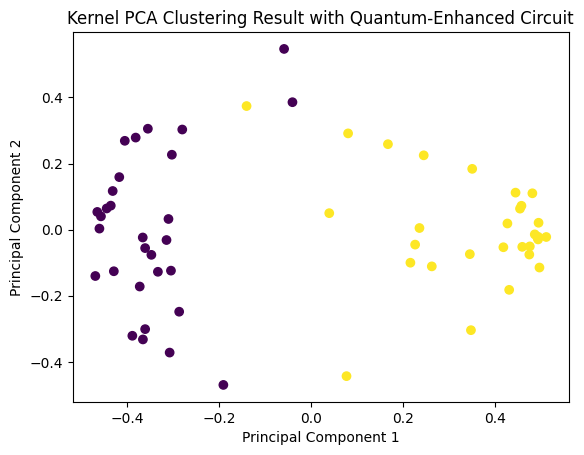

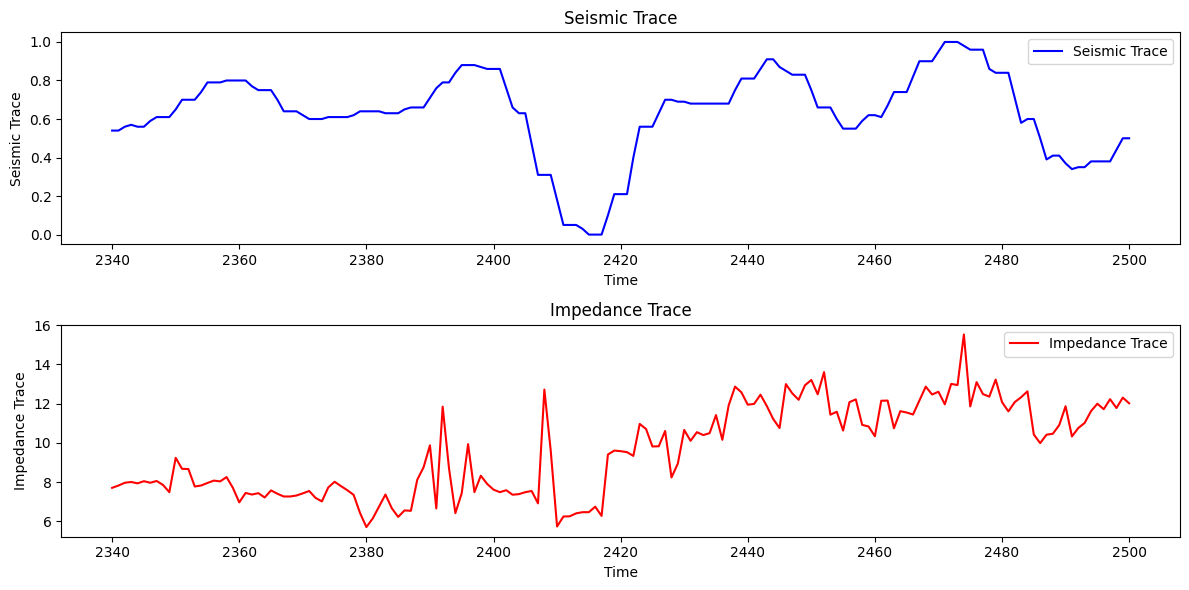

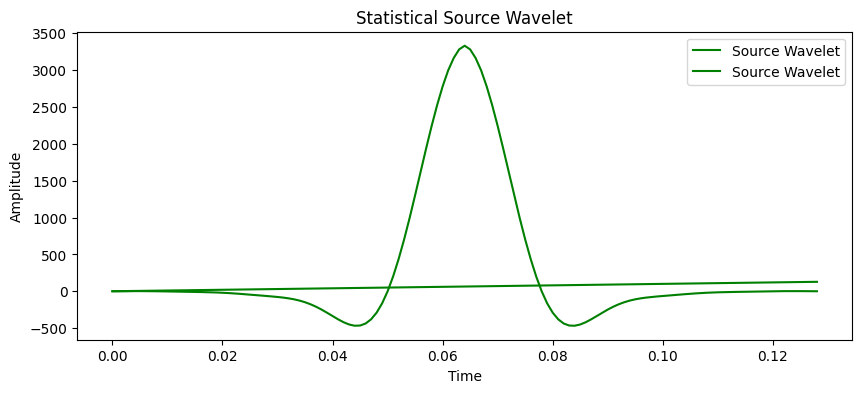

Seismic Trace (Cropped):
[0.54 0.54 0.56 0.57 0.56 0.56 0.59 0.61 0.61 0.61 0.65 0.7  0.7  0.7
 0.74 0.79 0.79 0.79 0.8  0.8  0.8  0.8  0.77 0.75 0.75 0.75 0.7  0.64
 0.64 0.64 0.62 0.6  0.6  0.6  0.61 0.61 0.61 0.61 0.62 0.64 0.64 0.64
 0.64 0.63 0.63 0.63 0.65 0.66 0.66 0.66 0.71 0.76 0.79 0.79 0.84 0.88
 0.88 0.88 0.87 0.86 0.86 0.86 0.76 0.66 0.63 0.63 0.47 0.31 0.31 0.31
 0.18 0.05 0.05 0.05 0.03 0.   0.   0.   0.1  0.21 0.21 0.21 0.4  0.56
 0.56 0.56 0.63 0.7  0.7  0.69 0.69 0.68 0.68 0.68 0.68 0.68 0.68 0.68
 0.75 0.81 0.81 0.81 0.86 0.91 0.91 0.87 0.85 0.83 0.83 0.83 0.75 0.66
 0.66 0.66 0.6  0.55 0.55 0.55 0.59 0.62 0.62 0.61 0.67 0.74 0.74 0.74
 0.82 0.9  0.9  0.9  0.95 1.   1.   1.   0.98 0.96 0.96 0.96 0.86 0.84
 0.84 0.84 0.71 0.58 0.6  0.6  0.5  0.39 0.41 0.41 0.37 0.34 0.35 0.35
 0.38 0.38 0.38 0.38 0.44 0.5  0.5 ]

Impedance Trace (Cropped):
[ 7.71  7.83  7.97  8.01  7.94  8.05  7.97  8.06  7.86  7.49  9.24  8.68
  8.67  7.78  7.83  7.96  8.08  8.04  8.26  7.71  6.97  7

In [ ]:
import pennylane as qml
import jax
from jax import numpy as jnp
import optax
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import KernelPCA
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

# Data preparation
seismic_data = np.genfromtxt('seismic_trace_15_9_F-15-A.csv', delimiter=';')

time_seismic = -np.round(seismic_data[:, 0])
time_seismic, unique_indices = np.unique(time_seismic, return_index=True)
dt_seismic = time_seismic[1] - time_seismic[0]

seismic_trace = seismic_data[unique_indices, 1]
Ip_trace = seismic_data[unique_indices, 2]

start_time = 2340.0
end_time = 2500.0

seismic_trace_cropped = seismic_trace[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]
Ip_trace_cropped = Ip_trace[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]
time_cropped = time_seismic[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]

source_statistical = np.genfromtxt('statistical_source_wavelet.txt', delimiter='\t')
dt_source = 1e-3

# Data normalization
scaler_seismic = MinMaxScaler()
seismic_trace_cropped_normalized = scaler_seismic.fit_transform(seismic_trace_cropped.reshape(-1, 1)).flatten()

scaler_ip = MinMaxScaler()
Ip_trace_cropped_normalized = scaler_ip.fit_transform(Ip_trace_cropped.reshape(-1, 1)).flatten()

# Define the data and targets
data = seismic_trace_cropped_normalized
targets = Ip_trace_cropped_normalized

# Quantum device setup
n_wires = 4
dev = qml.device("default.qubit", wires=8)

# Define the quantum circuit for the T-symmetric task
layers = 3  # Number of layers
gates = 3   # Number of gates

@qml.qnode(dev)
def circuit(data, weights):
    """Quantum circuit ansatz for seismic data"""

    # Data embedding
    for i in range(n_wires):
        qml.RY(data[i], wires=i)

    # Trainable ansatz
    for i in range(n_wires):
        qml.RX(weights[i, 0], wires=i)
        qml.RY(weights[i, 1], wires=i)
        qml.RX(weights[i, 2], wires=i)
        qml.CNOT(wires=[i, (i + 1) % n_wires])

    return qml.expval(qml.PauliZ(0))

def RandomLayers(weights, wires, rotations, seed):
    """Apply random layers with given weights and rotations to qubits."""
    np.random.seed(seed)
    for i, rot in enumerate(rotations):
        for wire in wires:
            rot(weights[i], wires=wire)

def noise_layer(angle):
    """Apply a noise layer with given angle."""
    for i in range(n_wires):
        qml.RZ(angle, wires=i)
        qml.CNOT(wires=[i, (i + 1) % n_wires])

# Generate random unitaries and perform the T-symmetric task
def generate_circuit(shots, ts=False):
    """Generate a random circuit for T-symmetric or general unitaries"""

    dev = qml.device("default.qubit", wires=n_wires)

    @qml.qnode(dev)
    def circuit(ts=False):
        if ts:
            ops = [qml.RY]  # T-symmetric unitaries
        else:
            ops = [qml.RX, qml.RY, qml.RZ]  # General unitaries

        weights = np.random.rand(layers, gates) * np.pi
        RandomLayers(weights, wires=range(n_wires), rotations=ops, seed=np.random.randint(0, 10000))

        # Return expectation values instead of samples
        return [qml.expval(qml.PauliY(q)) for q in range(n_wires)]

    return circuit

# Create and process raw data for the T-symmetric task
def process_data(raw_data):
    """Convert raw data to vectors of means and variances of each qubit"""

    raw_data = np.array(raw_data)
    nc = len(raw_data)  # Number of circuits
    nq = len(raw_data[0])  # Number of qubits
    new_data = np.zeros([nc, 2 * nq])

    for k, outcomes in enumerate(raw_data):
        means = [np.mean(outcomes[q, :]) for q in range(nq)]
        variances = [np.var(outcomes[q, :]) for q in range(nq)]
        new_data[k] = np.array(means + variances)

    return new_data

# Generate and process the data
circuits = 30
n_shots = 100

raw_data = []
for ts in [True, False]:
    for __ in range(circuits):
        circuit = generate_circuit(n_shots, ts)
        raw_data.append(circuit(ts=ts))

data = process_data(raw_data)

# Kernel PCA for clustering
kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=None, fit_inverse_transform=True, alpha=0.1)
scaler = preprocessing.StandardScaler().fit(data)
data = scaler.transform(data)
fit = kernel_pca.fit(data).transform(data)

# Print clustering metrics
c = np.array([0 for __ in range(circuits)] + [1 for __ in range(circuits)])
print(f"Number of clusters: {len(set(c))}")
print(f"Number of samples: {len(data)}")

# Compute and print silhouette score
silhouette_avg = silhouette_score(data, c)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Plot Kernel PCA results
plt.figure()
plt.scatter(fit[:, 0], fit[:, 1], c=c)
plt.title("Kernel PCA Clustering Result")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Quantum-enhanced circuit with noise
@qml.qnode(dev)
def enhanced_circuit(ts=False):
    """Enhanced circuit with a noise layer"""

    if ts:
        ops = [qml.RY]
    else:
        ops = [qml.RX, qml.RY, qml.RZ]

    weights = np.random.rand(layers, gates) * np.pi
    seed = np.random.randint(0, 10000)

    for q in range(4):
        qml.Hadamard(wires=q)

    qml.broadcast(
        qml.CNOT, pattern=[[q, 4 + q] for q in range(4)], wires=range(4 * 2)
    )
    RandomLayers(weights, wires=range(0, 4), rotations=ops, seed=seed)
    RandomLayers(weights, wires=range(4, 2 * 4), rotations=ops, seed=seed)
    noise_layer(np.pi / 4)
    qml.broadcast(
        qml.CNOT, pattern=[[4 + q, q] for q in range(4)], wires=range(4 * 2)
    )

    for q in range(4):
        qml.Hadamard(wires=4 + q)

    # Return expectation values instead of samples
    return [qml.expval(qml.PauliZ(q)) for q in range(2 * 4)]

# Generate and process data for enhanced circuit
raw_data = []
for ts in [True, False]:
    for __ in range(circuits):
        raw_data.append(enhanced_circuit(ts))

data = process_data(raw_data)
scaler = preprocessing.StandardScaler().fit(data)
data = scaler.transform(data)
fit = kernel_pca.fit(data).transform(data)

# Print clustering metrics for enhanced circuit
c = np.array([0 for __ in range(circuits)] + [1 for __ in range(circuits)])
print(f"Number of clusters (enhanced): {len(set(c))}")
print(f"Number of samples (enhanced): {len(data)}")

# Compute and print silhouette score for enhanced circuit
silhouette_avg = silhouette_score(data, c)
print(f"Silhouette Score (enhanced): {silhouette_avg:.2f}")

# Plot Kernel PCA results for enhanced circuit
plt.figure()
plt.scatter(fit[:, 0], fit[:, 1], c=c)
plt.title("Kernel PCA Clustering Result with Quantum-Enhanced Circuit")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Plot seismic and impedance traces
def plot_seismic_and_impedance():
    plt.figure(figsize=(12, 6))

    # Plot seismic trace
    plt.subplot(2, 1, 1)
    plt.plot(time_cropped, seismic_trace_cropped, label='Seismic Trace', color='blue')
    plt.xlabel('Time')
    plt.ylabel('Seismic Trace')
    plt.title('Seismic Trace')
    plt.legend()

    # Plot impedance trace
    plt.subplot(2, 1, 2)
    plt.plot(time_cropped, Ip_trace_cropped, label='Impedance Trace', color='red')
    plt.xlabel('Time')
    plt.ylabel('Impedance Trace')
    plt.title('Impedance Trace')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot statistical source wavelet
def plot_source_wavelet():
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(0, len(source_statistical) * dt_source, dt_source), source_statistical, label='Source Wavelet', color='green')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('Statistical Source Wavelet')
    plt.legend()
    plt.show()

# Print sample values
def print_sample_values():
    print("Seismic Trace (Cropped):")
    print(seismic_trace_cropped)
    print("\nImpedance Trace (Cropped):")
    print(Ip_trace_cropped)
    print("\nStatistical Source Wavelet:")
    print(source_statistical)

# Call the functions
plot_seismic_and_impedance()
plot_source_wavelet()
print_sample_values()


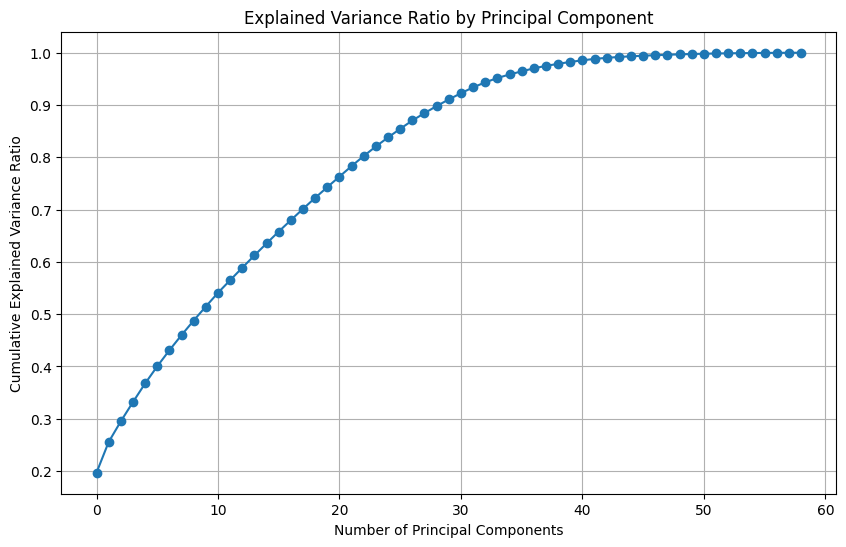

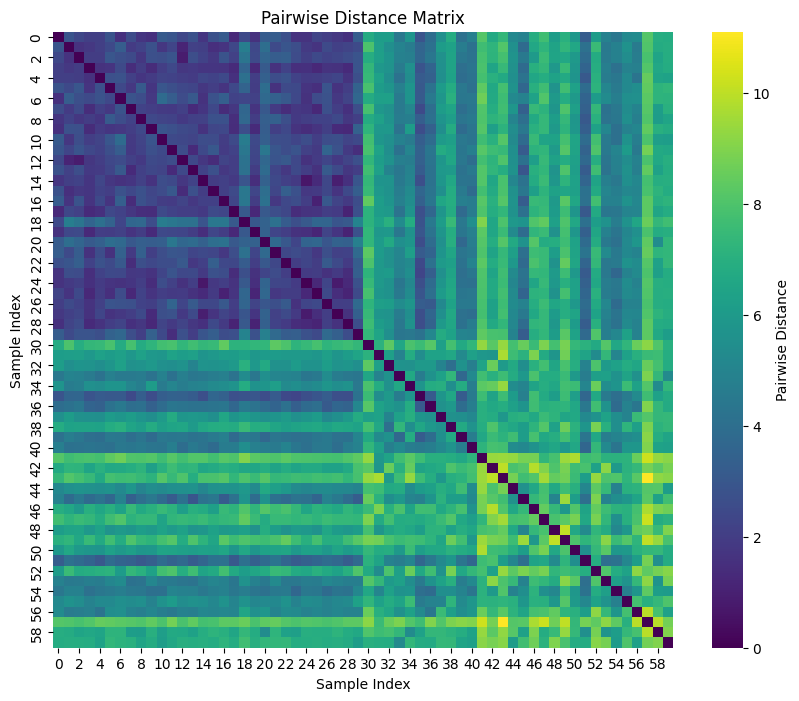

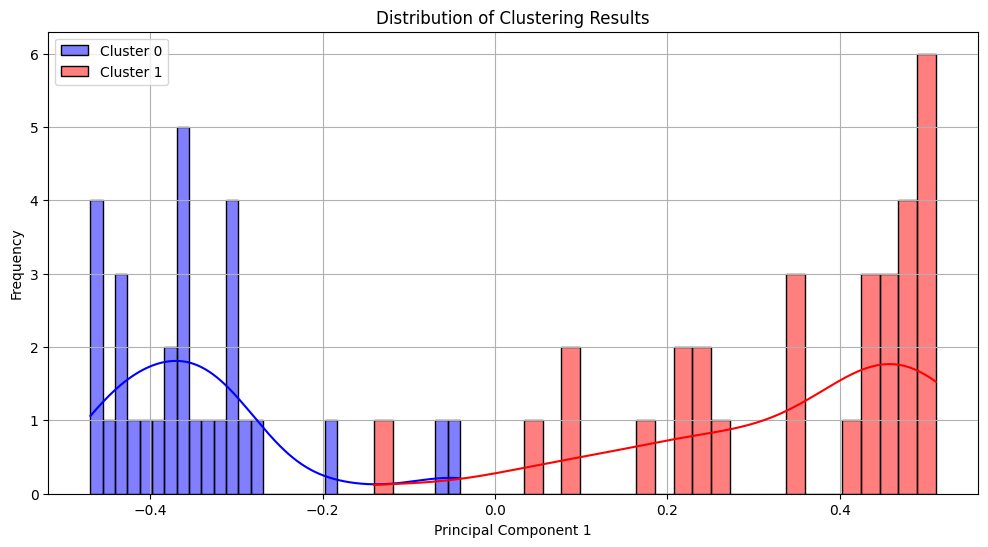

Silhouette Score: 0.59


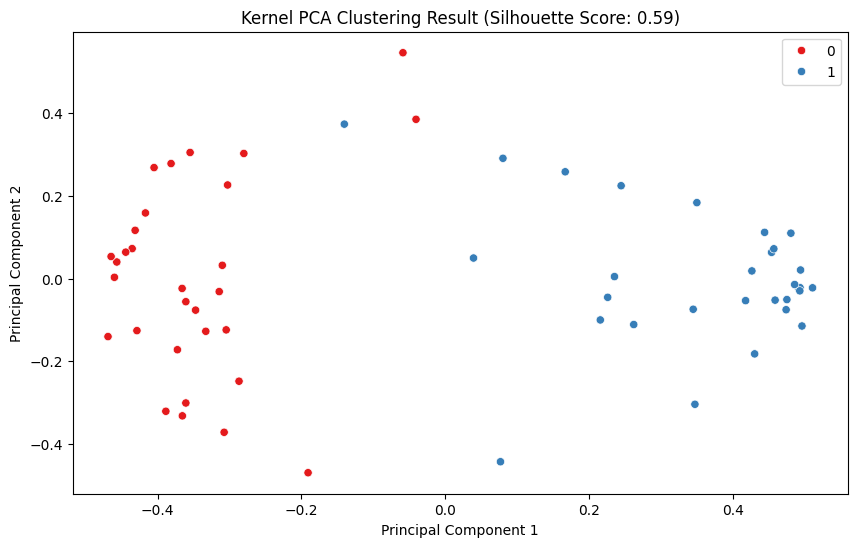

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

# Kernel PCA explained variance ratio
def plot_explained_variance(kernel_pca, data):
    """Plot explained variance ratio for each principal component."""
    # Perform Kernel PCA
    kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=None, fit_inverse_transform=True, alpha=0.1)
    transformed_data = kernel_pca.fit_transform(data)

    # Eigenvalues
    eigenvalues = np.var(transformed_data, axis=0)

    # Explained variance ratio
    explained_variance = eigenvalues / np.sum(eigenvalues)

    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(explained_variance), marker='o')
    plt.title('Explained Variance Ratio by Principal Component')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.grid(True)
    plt.show()

# Pairwise distance matrix plot
def plot_distance_matrix(data):
    """Plot pairwise distance matrix."""
    distances = pairwise_distances(data)

    plt.figure(figsize=(10, 8))
    sns.heatmap(distances, cmap='viridis', cbar_kws={'label': 'Pairwise Distance'})
    plt.title('Pairwise Distance Matrix')
    plt.xlabel('Sample Index')
    plt.ylabel('Sample Index')
    plt.show()

# Clustering result distribution
def plot_clustering_distribution(data, labels):
    """Plot distribution of clustering results."""
    plt.figure(figsize=(12, 6))
    sns.histplot(data[labels == 0, 0], color='blue', label='Cluster 0', kde=True, bins=30)
    sns.histplot(data[labels == 1, 0], color='red', label='Cluster 1', kde=True, bins=30)
    plt.title('Distribution of Clustering Results')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Additional clustering metrics
def plot_clustering_metrics(data, labels):
    """Plot metrics and distributions for clustering results."""
    silhouette_avg = silhouette_score(data, labels)
    print(f"Silhouette Score: {silhouette_avg:.2f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='Set1', legend='full')
    plt.title(f'Kernel PCA Clustering Result (Silhouette Score: {silhouette_avg:.2f})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Re-create and process Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel="rbf", gamma=None, fit_inverse_transform=True, alpha=0.1)
scaler = StandardScaler().fit(data)
data_scaled = scaler.transform(data)
transformed_data = kernel_pca.fit_transform(data_scaled)

# Call the plotting functions
plot_explained_variance(kernel_pca, data_scaled)
plot_distance_matrix(data_scaled)
plot_clustering_distribution(transformed_data, c)
plot_clustering_metrics(transformed_data, c)


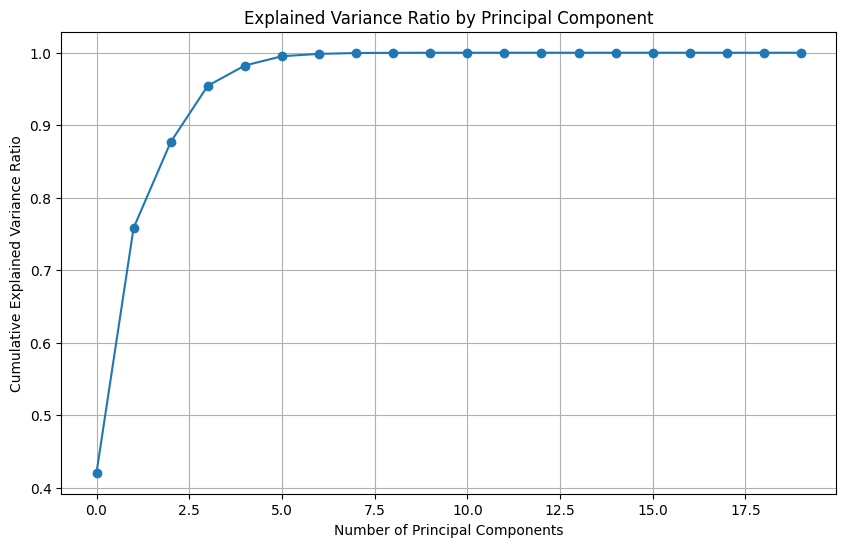

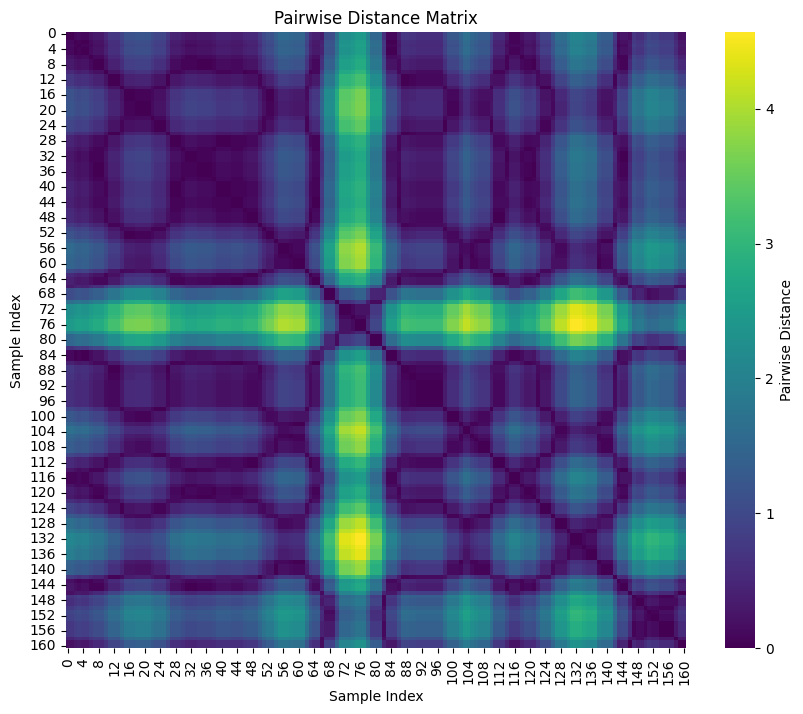

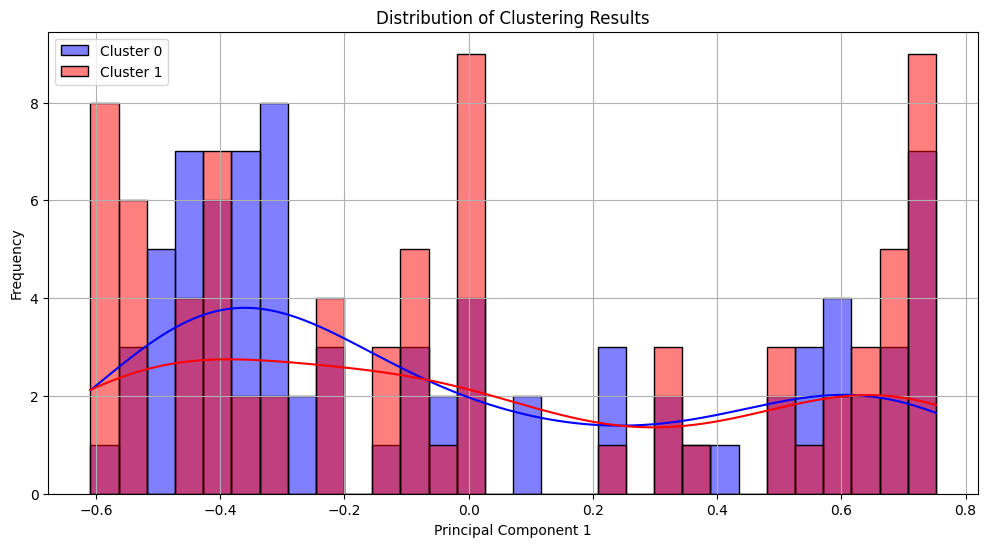

Silhouette Score: 0.01


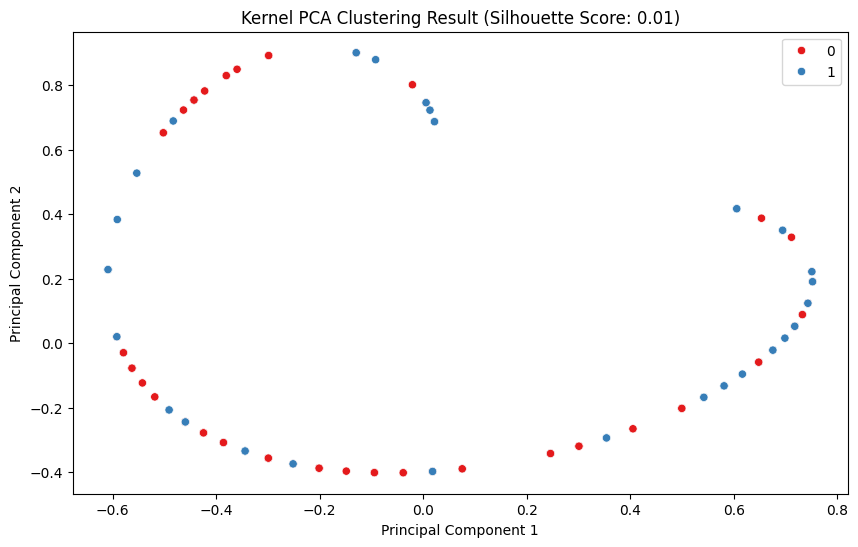

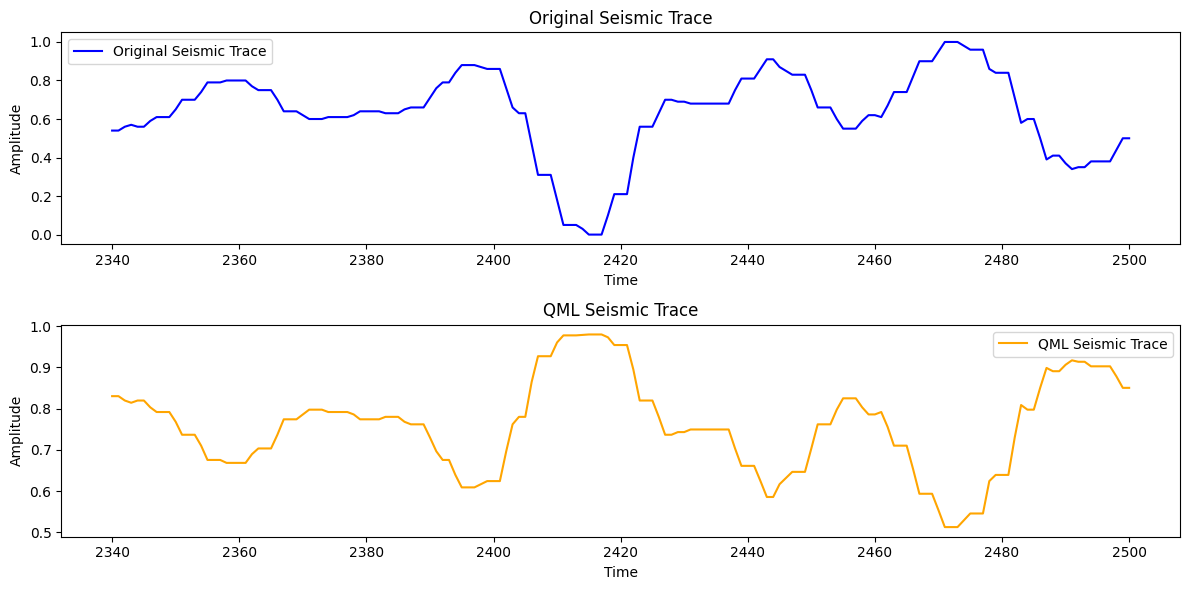

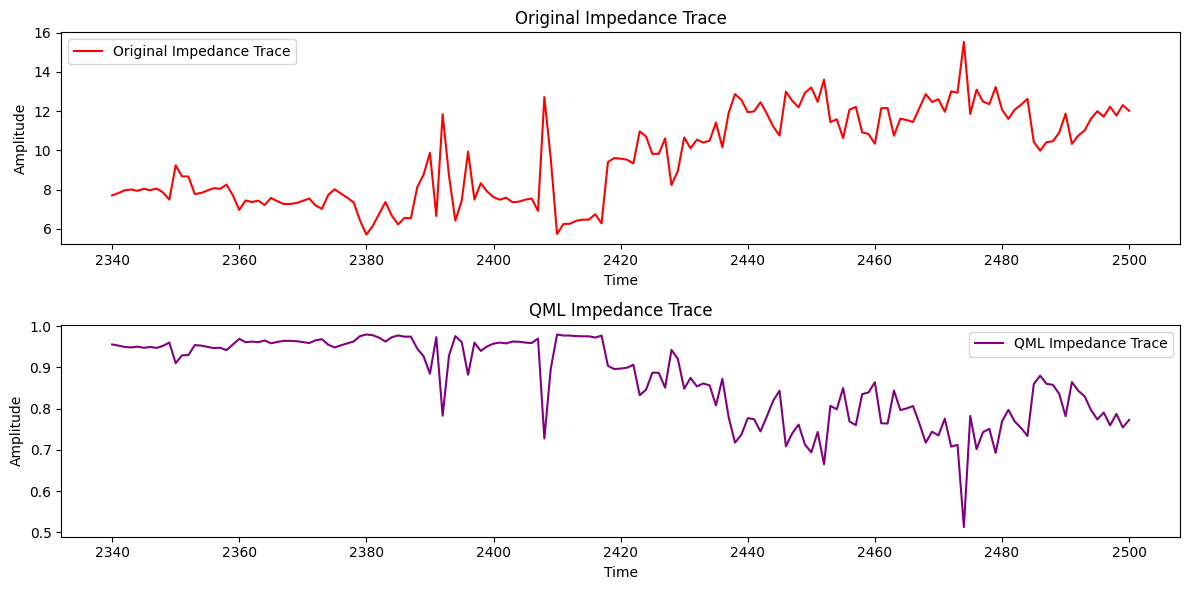

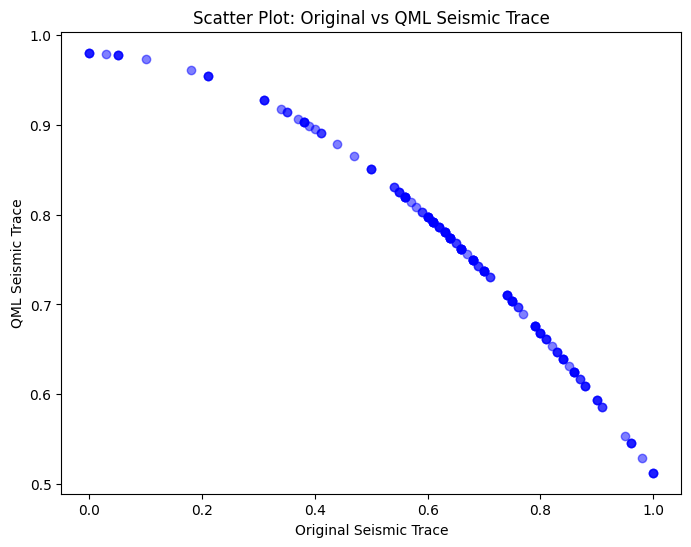

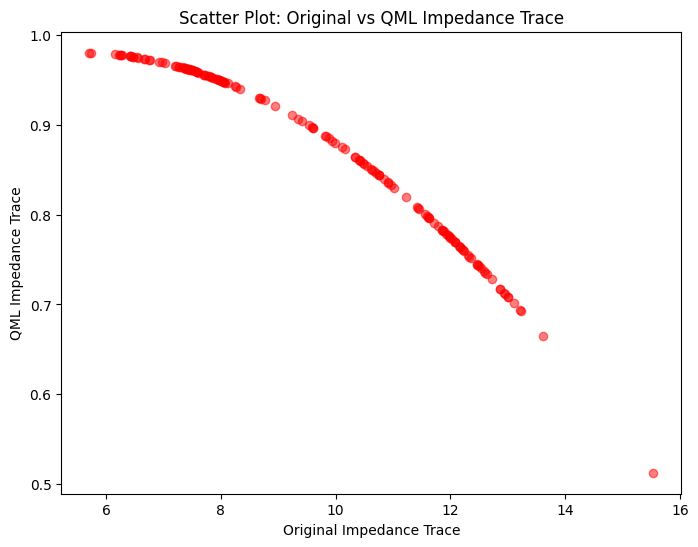

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pennylane as qml
import jax
from jax import numpy as jnp

# Data preparation
seismic_data = np.genfromtxt('seismic_trace_15_9_F-15-A.csv', delimiter=';')
time_seismic = -np.round(seismic_data[:, 0])
time_seismic, unique_indices = np.unique(time_seismic, return_index=True)
dt_seismic = time_seismic[1] - time_seismic[0]

seismic_trace = seismic_data[unique_indices, 1]
Ip_trace = seismic_data[unique_indices, 2]

start_time = 2340.0
end_time = 2500.0

seismic_trace_cropped = seismic_trace[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]
Ip_trace_cropped = Ip_trace[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]
time_cropped = time_seismic[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]

source_statistical = np.genfromtxt('statistical_source_wavelet.txt', delimiter='\t')
dt_source = 1e-3

# Data normalization
scaler_seismic = MinMaxScaler()
seismic_trace_cropped_normalized = scaler_seismic.fit_transform(seismic_trace_cropped.reshape(-1, 1)).flatten()

scaler_ip = MinMaxScaler()
Ip_trace_cropped_normalized = scaler_ip.fit_transform(Ip_trace_cropped.reshape(-1, 1)).flatten()

# Define the data and targets
data = seismic_trace_cropped_normalized
targets = Ip_trace_cropped_normalized

# Define quantum device and circuit
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def quantum_circuit(params, x):
    if np.isscalar(x):
        x = np.array([x])  # Convert scalar to array
    qml.AngleEmbedding(x, wires=range(len(x)))
    qml.Rot(*params, wires=0)
    return qml.expval(qml.PauliZ(0))

def get_qml_output(seismic_data):
    """Process seismic data through QML model."""
    # Define parameters for the quantum circuit (example parameters)
    params = jnp.array([0.1, 0.2, 0.3])

    # Compute QML outputs
    qml_outputs = np.array([quantum_circuit(params, x) for x in seismic_data])
    return qml_outputs

# Kernel PCA explained variance ratio
def plot_explained_variance(kernel_pca, data):
    """Plot explained variance ratio for each principal component."""
    kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=None, fit_inverse_transform=True, alpha=0.1)
    transformed_data = kernel_pca.fit_transform(data)

    eigenvalues = np.var(transformed_data, axis=0)
    explained_variance = eigenvalues / np.sum(eigenvalues)

    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(explained_variance), marker='o')
    plt.title('Explained Variance Ratio by Principal Component')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.grid(True)
    plt.show()

# Pairwise distance matrix plot
def plot_distance_matrix(data):
    """Plot pairwise distance matrix."""
    distances = pairwise_distances(data)

    plt.figure(figsize=(10, 8))
    sns.heatmap(distances, cmap='viridis', cbar_kws={'label': 'Pairwise Distance'})
    plt.title('Pairwise Distance Matrix')
    plt.xlabel('Sample Index')
    plt.ylabel('Sample Index')
    plt.show()

# Clustering result distribution
def plot_clustering_distribution(data, labels):
    """Plot distribution of clustering results."""
    plt.figure(figsize=(12, 6))
    sns.histplot(data[labels == 0, 0], color='blue', label='Cluster 0', kde=True, bins=30)
    sns.histplot(data[labels == 1, 0], color='red', label='Cluster 1', kde=True, bins=30)
    plt.title('Distribution of Clustering Results')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Additional clustering metrics
def plot_clustering_metrics(data, labels):
    """Plot metrics and distributions for clustering results."""
    silhouette_avg = silhouette_score(data, labels)
    print(f"Silhouette Score: {silhouette_avg:.2f}")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='Set1', legend='full')
    plt.title(f'Kernel PCA Clustering Result (Silhouette Score: {silhouette_avg:.2f})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Re-create and process Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel="rbf", gamma=None, fit_inverse_transform=True, alpha=0.1)
scaler = StandardScaler().fit(data.reshape(-1, 1))
data_scaled = scaler.transform(data.reshape(-1, 1))
transformed_data = kernel_pca.fit_transform(data_scaled)

# QML processing
qml_seismic_trace = get_qml_output(seismic_trace_cropped_normalized)
qml_impedance_trace = get_qml_output(Ip_trace_cropped_normalized)

qml_data = {
    'seismic_trace': qml_seismic_trace,
    'impedance_trace': qml_impedance_trace
}

# Call the plotting functions
plot_explained_variance(kernel_pca, data_scaled)
plot_distance_matrix(data_scaled)
plot_clustering_distribution(transformed_data, np.random.randint(0, 2, len(data_scaled)))
plot_clustering_metrics(transformed_data, np.random.randint(0, 2, len(data_scaled)))

# Plot original vs QML seismic trace
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_cropped, seismic_trace_cropped, label='Original Seismic Trace', color='blue')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original Seismic Trace')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_cropped, qml_data['seismic_trace'], label='QML Seismic Trace', color='orange')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('QML Seismic Trace')
plt.legend()

plt.tight_layout()
plt.show()

# Plot original vs QML impedance trace
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_cropped, Ip_trace_cropped, label='Original Impedance Trace', color='red')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original Impedance Trace')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_cropped, qml_data['impedance_trace'], label='QML Impedance Trace', color='purple')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('QML Impedance Trace')
plt.legend()

plt.tight_layout()
plt.show()

# Scatter plot of original vs QML seismic trace
plt.figure(figsize=(8, 6))
plt.scatter(seismic_trace_cropped, qml_data['seismic_trace'], alpha=0.5, c='blue')
plt.xlabel('Original Seismic Trace')
plt.ylabel('QML Seismic Trace')
plt.title('Scatter Plot: Original vs QML Seismic Trace')
plt.show()

# Scatter plot of original vs QML impedance trace
plt.figure(figsize=(8, 6))
plt.scatter(Ip_trace_cropped, qml_data['impedance_trace'], alpha=0.5, c='red')
plt.xlabel('Original Impedance Trace')
plt.ylabel('QML Impedance Trace')
plt.title('Scatter Plot: Original vs QML Impedance Trace')
plt.show()
